# Numpy und Matplotlib

CPython ist eine interpretierte Programmiersprache, jede Python-Anweisung des Codes wird Zeile für Zeile eingelesen, übersetzt und dann ausgeführt. Folge: Im Gegensatz zu kompilierten Programmiersprachen relativ langsame Ausführung, besonders bei Schleifen. Meist ca. 100x langsamer als C.

## Motivation: Eine Monte-Carlo-Methode zur Schätzung von $\pi$

#### Lösung mit Schleifen

In [1]:
%%time
# Monte-Carlo-Methode zur näherungsweisen Berechnung von pi
#
# 1. Ziehe N zufällige Punkte aus dem Einheitsquadrat. Jeder Punkt hat eine zufällige x- und y-Koordinate 
#    zwischen 0 und 1 (gleichförmig verteilt).
# 2. Prüfe für jeden dieser Punkte, ob er im Einheitskreis liegt, d.h., ob x**2 + y**2 <= 1 ist.
# 3. Die Fläche eines Viertels des Einheitskreises dividiert dividiert durch die Fläche des Einheitsquadrats ist
#    pi/4. Dies ist ebenfalls die Wahrscheinlichkeit, dass einer zufälligen Punkte im Einheitsquadrat landet.
# 4. Häufigkeit sollte nach Gesetz der großen Zahlen gegen die Wahrscheinlichkeit gehen, d.h.
#    Anzahl der Punkte im Einheitskreis durch Anzahl der Punkte insgesamt sollte gegen pi/4 gehen.
#    "Monte-Carlo-Schätzer für pi = 4*(Anzahl Treffer)/(Anzahl Versuche)

from random import random
from math import pi
N = 10_000_000
hits = 0 # Anzahl der Treffer
for i in range(N):
    x = random()
    y = random()    
    if x*x + y*y <= 1:
        hits += 1

print(f"MC-Schätzer für pi = {4*hits/N} (wahrer Wert: {pi})")

MC-Schätzer für pi = 3.1419588 (wahrer Wert: 3.141592653589793)
CPU times: user 1.74 s, sys: 6.42 ms, total: 1.75 s
Wall time: 1.75 s


#### Lösung mit `numpy`
`numpy` ist eine Bibliothek zur Rechnung mit Vektoren, Matrizen und Arrays höherer Ordnung.

In [2]:
import numpy as np
# Enthält die üblichen mathematischen Funktionen und Konstanten
print(f"{np.sin(3.14) = }")
print(f"{np.cos(np.pi) = }")

np.sin(3.14) = np.float64(0.0015926529164868282)
np.cos(np.pi) = np.float64(-1.0)


Ebenfalls vorhanden: random-Bibliothek, die aber Matrizen und Vektoren von Zufallszahlen erzeugen kann.

In [34]:
#np.random.seed(42)
np.random.random(10)

array([0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041])

In [3]:
# Matrix von Zufallszahlen
np.random.random([2, 3]) # 2 Zeilen, 3 Spalten

array([[0.97709182, 0.57209624, 0.90037114],
       [0.92792821, 0.46089654, 0.74510887]])

Auf diesen Matrizen arbeiten Funktionen und Operatoren komponentenweise, d.h. wirken auf jeden Matrixeintrag.

In [40]:
# Matrix
A = np.array([[2, 3], [4, 5]])
A

array([[2, 3],
       [4, 5]])

In [41]:
np.sqrt(A)

array([[1.41421356, 1.73205081],
       [2.        , 2.23606798]])

In [42]:
A*A # Komponentenweise Multiplikation

array([[ 4,  9],
       [16, 25]])

In [43]:
A@A # Matrixprodukt

array([[16, 21],
       [28, 37]])

In [16]:
%%time
# MC-Methode mit numpy

N = 10_000_000
x = np.random.random(N)
y = np.random.random(N)

hits = (x*x + y*y <= 1)

print(f"MC-Schätzer für pi = {4*np.sum(hits)/N}")

MC-Schätzer für pi = 3.1417624
CPU times: user 106 ms, sys: 24.4 ms, total: 131 ms
Wall time: 131 ms


## Performance-Messungen ohne iPython (%%time)

In [5]:
# Funktion zur Schätzung von pi mit Monte Carlo
from random import random
def mc_pi(N):
    hits = 0 # Anzahl der Treffer
    for i in range(N):
        x = random()
        y = random()    
        if x*x + y*y <= 1:
            hits += 1
    return 4*hits/N

In [59]:
%%timeit
mc_pi(40_000_000)

3.67 s ± 66.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
# Performance-Messung mit time
import time
for k in range(10):
    time.sleep(0.1) # Schlafe für eine Zehntelsekunde
    print(time.time())

t1 = time.time()
val = mc_pi(4_000_000)
t2 = time.time()
print(f"Laufzeit = {t2 - t1} Sekunden.")

1746454426.90667
1746454427.008468
1746454427.110836
1746454427.215195
1746454427.3210812
1746454427.42577
1746454427.527183
1746454427.628716
1746454427.7308328
1746454427.832844
Laufzeit = 0.3986470699310303 Sekunden.


In [13]:
help(time.perf_counter)

Help on built-in function perf_counter in module time:

perf_counter(...)
    perf_counter() -> float

    Performance counter for benchmarking.



In [73]:
%%time
# Empfohlen für Benchmarks: time.perf_counter() statt time.time()
from time import perf_counter, perf_counter_ns

t1 = perf_counter_ns()
mc_pi(4_000_000)
t2 = perf_counter_ns()
t2-t1

CPU times: user 391 ms, sys: 3.43 ms, total: 395 ms
Wall time: 395 ms


395211084

## Alternative: Numba

In [6]:
import numba
import time

In [12]:
def mc_naive(N):
    hits = 0 # Anzahl der Treffer
    for i in range(N):
        x = random()
        y = random()    
        if x*x + y*y <= 1:
            hits += 1
    return 4*hits/N
    
@numba.njit
def mc_naive_jit(N):
    hits = 0 # Anzahl der Treffer
    for i in range(N):
        x = random()
        y = random()    
        if x*x + y*y <= 1:
            hits += 1
    return 4*hits/N

def mc_numpy(N):
    x = np.random.random(N)
    y = np.random.random(N)
    hits = (x*x + y*y <= 1)
    return 4*np.sum(hits)/N

@numba.njit
def mc_numpy_jit(N):
    x = np.random.random(N)
    y = np.random.random(N)
    hits = (x*x + y*y <= 1)
    return 4*np.sum(hits)/N

In [13]:
N = 4_000_000

t1 = time.perf_counter()
pi_mc = mc_naive(N)
t2 = time.perf_counter()
print(f"mc_naive: \t {pi_mc} in {t2 - t1} sec.")

t1 = time.perf_counter()
pi_mc = mc_naive_jit(N)
t2 = time.perf_counter()
print(f"mc_naive_jit: \t {pi_mc} in {t2 - t1} sec.")

t1 = time.perf_counter()
pi_mc = mc_numpy(N)
t2 = time.perf_counter()
print(f"mc_numpy: \t {pi_mc} in {t2 - t1} sec.")

t1 = time.perf_counter()
pi_mc = mc_numpy_jit(N)
t2 = time.perf_counter()
print(f"mc_numpy_jit: \t {pi_mc} in {t2 - t1} sec.")

mc_naive: 	 3.141404 in 0.38488904099722276 sec.
mc_naive_jit: 	 3.140767 in 0.05003804100124398 sec.
mc_numpy: 	 3.141693 in 0.03974954200020875 sec.
mc_numpy_jit: 	 3.141845 in 0.06954300000143121 sec.


## Matplotlib
Bibliothek zur Visualisierung, angelehnt an MATLAB.

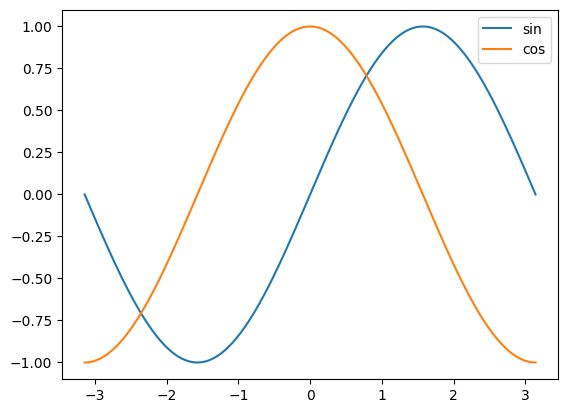

In [59]:
# %matplotlib widgets
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 200)
fig = plt.figure() # Neue Abbildung
plt.plot(x, np.sin(x));
plt.plot(x, np.cos(x));
plt.legend(["sin", "cos"])
plt.show()  # In einigen Umgebungen wird die Abbildung ohne show() nicht gezeigt.

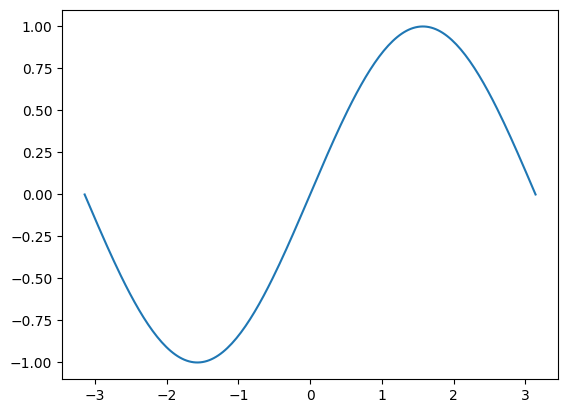

In [36]:
# Alternative, weniger an MATLAB orientierte Syntax
fig, ax = plt.subplots()
ax.plot(x, np.sin(x));

In [37]:
from numpy.random import rand, randn, normal
randn(10) # Ziehe 10 Punkte aus Standardnormalverteilung

array([-1.03151877,  0.11337627,  0.44733097, -0.59728217,  0.97905374,
        0.93668004, -1.27417299, -0.26789321, -0.80674812, -0.94218528])

In [44]:
normal(0, 1, 10) # Ziehe 10 Punkte aus Standardnormalverteilung

array([-0.33154487,  0.9019898 , -0.90692442,  1.99764081,  1.62599293,
        0.55270615,  0.05233502, -1.18827343,  0.28100315, -1.89095638])

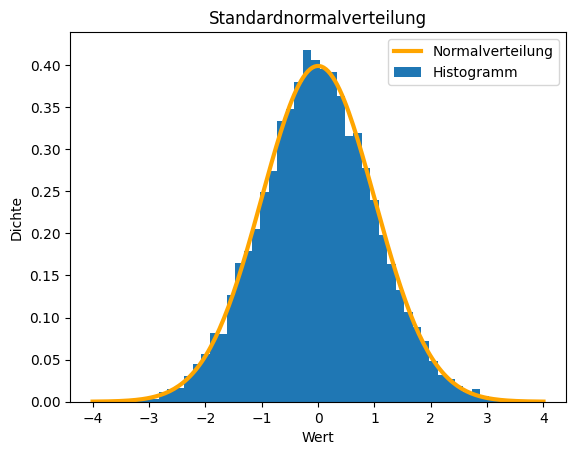

In [60]:
%matplotlib inline
# Dichte der Standardnormalverteilung
def p_normal(x):
    return np.exp(-x*x/2.0)/np.sqrt(2*np.pi)


N = 10_000
x = randn(N)
fig_normal_hist = plt.figure(1)
plt.title("Standardnormalverteilung")
plt.xlabel("Wert")
plt.ylabel("Dichte")
plt.hist(x, bins=50, density=True)
x_lin = np.linspace(-4, 4, 200)
plt.plot(x_lin, p_normal(x_lin), c='orange', lw=3)
plt.legend(["Normalverteilung", "Histogramm"]) # Labels als Liste von Strings
plt.show()

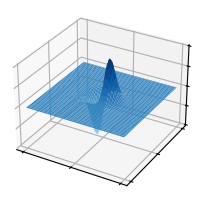

In [68]:
%matplotlib widget
### 3D-Plot
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp( -(X**2 + Y**2) ) * np.sin(X) * np.cos(Y)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

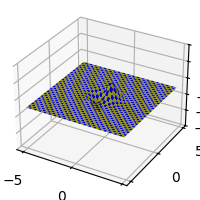

In [69]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import LinearLocator

ax = plt.figure().add_subplot(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)) * np.sin(X) * np.cos(Y)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(6))

plt.show()

In [ ]:
x = np.arange(1, 3, 1)
y = np.arange(1, 4, 1)
x, y
grid = np.meshgrid(x, y)
grid